In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables from the database
Base.prepare(autoload_with=engine)

['station', 'measurement']


In [10]:
# View all of the classes that automap found
print(Base.classes.keys())

['station', 'measurement']


In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
print(most_recent_date)

2017-08-23


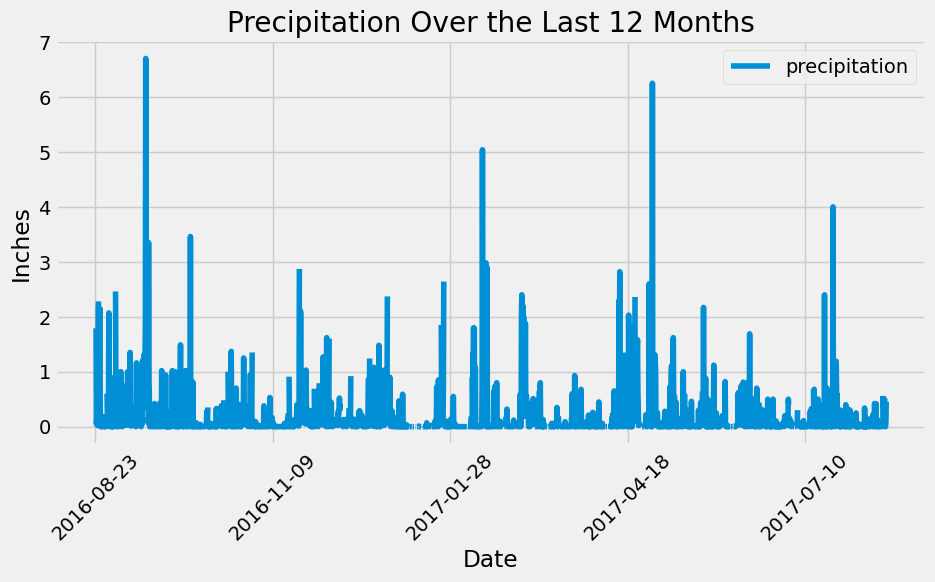

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365) 

# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_data, columns=['date', 'precipitation'])


# Sort the dataframe by date
precip_df = precip_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(x='date', y='precipitation', figsize=(10, 5), rot=45, legend=True)

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation Over the Last 12 Months")

# Show the plot
plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(func.count(Station.station)).scalar()
print(f"Total number of stations: {num_stations}")

Total number of stations: 9


In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# Print the results
for station, count in active_stations:
    print(f"Station {station} had {count} observations.")

Station USC00519281 had 2772 observations.
Station USC00519397 had 2724 observations.
Station USC00513117 had 2709 observations.
Station USC00519523 had 2669 observations.
Station USC00516128 had 2612 observations.
Station USC00514830 had 2202 observations.
Station USC00511918 had 1979 observations.
Station USC00517948 had 1372 observations.
Station USC00518838 had 511 observations.


In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_stats = session.query(
    func.min(Measurement.tobs), 
    func.max(Measurement.tobs), 
    func.avg(Measurement.tobs)
).filter(Measurement.station == 'USC00519281').all()

# Extract results from the tuple
min_temp = temp_stats[0][0]
max_temp = temp_stats[0][1]
avg_temp = temp_stats[0][2]

# Print the results
print(f"Min Temp: {min_temp}°F")
print(f"Max Temp: {max_temp}°F")
print(f"Avg Temp: {avg_temp:.2f}°F")

Min Temp: 54.0°F
Max Temp: 85.0°F
Avg Temp: 71.66°F


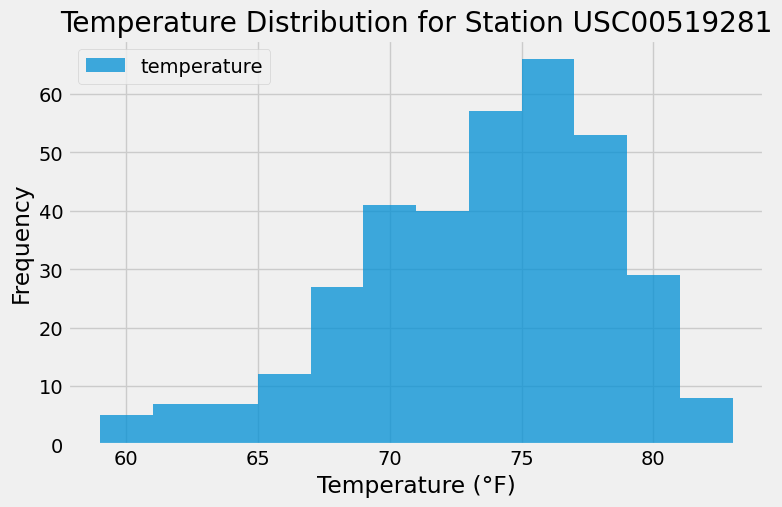

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Query the last 12 months of temperature data for the most active station
temp_data = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= one_year_ago).all()

# Convert query results to a Pandas DataFrame
temp_df = pd.DataFrame(temp_data, columns=['temperature'])

# Plot a histogram of temperature observations
temp_df.plot.hist(bins=12, figsize=(8, 5), alpha=0.75, legend=True)

# Add labels and title
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.title("Temperature Distribution for Station USC00519281")

# Show the plot
plt.show()

# Close Session

In [24]:
# Close Session
session.close()